In [33]:
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

In [34]:
os.getcwd()

'F:\\git\\aind\\deeplearn\\cv_keypoints_capstone\\nbex'

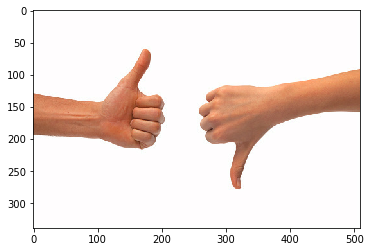

In [35]:
image = cv2.cvtColor(cv2.imread('thumbs-up-down.jpg'), cv2.COLOR_BGR2RGB)
plt.imshow(image)

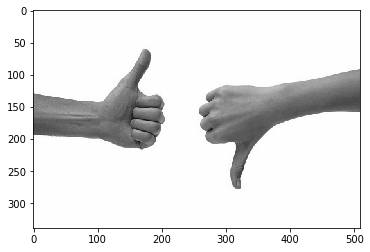

In [51]:
gray = np.average(image, axis=-1).astype(np.uint8)
plt.imshow(gray, cmap='gray')

In [52]:
retval, binarized = cv2.threshold(gray, 225, 255, cv2.THRESH_BINARY_INV)

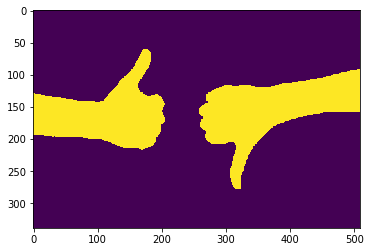

In [53]:
plt.imshow(binarized)

In [55]:
retval, contours, hierarchy = cv2.findContours(binarized, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

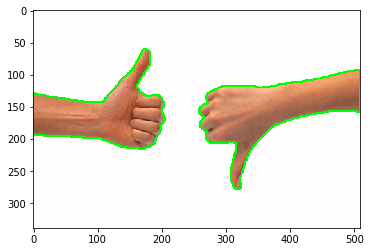

In [57]:
plt.imshow(all_contours)

272


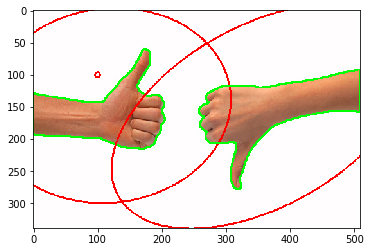

245


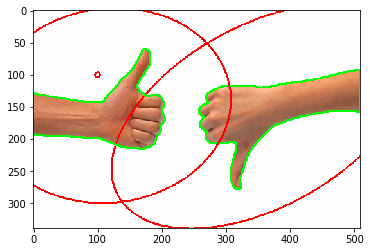

In [83]:
for contour in contours:
    print(len(contour))
    #get ellipse
    (x,y), (MA,ma), angle = cv2.fitEllipse(contour)
    x, y, MA, ma = [int(x) for x in [x, y, MA, ma]]
    #draw contour
    s_contours = cv2.drawContours(np.copy(image), contours, -1, (0,255,2), 2)
    #draw ellipse
    s_contours = cv2.ellipse(np.copy(s_contours), (x,y), (MA,ma), angle, 0, 360, (255,0,0), 2)
    plt.imshow(s_contours)
    plt.show()

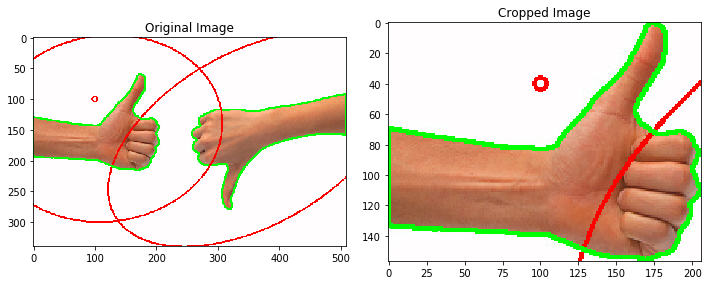

In [84]:
def left_hand_crop(image, selected_contour):
    """
    Left hand crop 
    :param image: the original image
    :param contours: the contour that will be used for cropping
    :return: the cropped image around the left hand
    """
    
    ## TODO: Detect the bounding rectangle of the left hand contour
    
    ## TODO: Crop the image using the dimensions of the bounding rectangle
    # Make a copy of the image to crop
    cropped_image = np.copy(image)
    (x,y), (MA,ma), angle = cv2.fitEllipse(selected_contour)
    x, y, MA, ma = [int(x) for x in [x, y, MA, ma]]
    s_contour = cv2.drawContours(np.copy(image), selected_contour, -1, (0,255,2), 2)
    x,y,w,h = cv2.boundingRect(selected_contour)
    box_image = cv2.rectangle(s_contour, (x,y), (x+w,y+h), (200,0,200),2)
    cropped_image = image[y: y + h, x: x + w]
    
    return cropped_image


## TODO: Select the left hand contour from the list
## Replace this value
selected_contour = contours[1]

# If you've selected a contour
if(selected_contour is not None):
    # Call the crop function with that contour passed in as a parameter
    cropped_image = left_hand_crop(image, selected_contour)
    
    # Display the cropped image side-by-side with the original
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    f.tight_layout()
    ax1.imshow(image)
    ax1.set_title('Original Image')
    ax2.imshow(cropped_image)
    ax2.set_title('Cropped Image')